## Ejercicio de  Visualización
* **Equipo:** 3
* **Grupo:** 003 (Lunes 18-21)
* **Integrantes:**
    * 1860533 De León Flores Jennifer Priscila
    * 1858788 Gallegos Luna Enrique Alejandro
    * 1860043 Rodríguez Morales Mario Alberto
    * 1862717 Ruiz Ramirez Luis Angel

### Base de datos principal
* **Nombre:** U.S. Gasoline and Diesel Retail Prices 1995-2021
* **URL:** https://www.kaggle.com/mruanova/us-gasoline-and-diesel-retail-prices-19952021

#### Parte descriptiva

In [3]:
import pandas as pd
import numpy as np
import json
df=pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")

Una vez que importamos la base renombramos algunas columnas, las cuales incluyen el precio según el tipo de gasolina y no su octanaje y sumaremos los precios de la columna la cual contiene el precio promedio de todos los tipos de gasolina en los Estados Unidos desde el 02 de enero de 1995 hasta el 25 de enero de 2021:

In [79]:
df.rename(columns={'A1':'All Grades','R1':'Regular','M1':'Midgraded','P1':'Premium','D1':'Diesel'},inplace=True)
r=df['All Grades'].sum()
print("La suma de los precios promedio de los tipos de gasolina en conjunto es: ",r)

La suma de los precios promedio de los tipos de gasolina en conjunto es:  3110.81


Ahora sumaremos cada una de las columnas según el tipo de gasolina en su precio promedio, recordando que se mira pequeño dado que son precios en dólares

In [18]:
a=df['Regular'].sum()
b=df['Midgraded'].sum()
c=df['Premium'].sum()
d=df['Diesel'].sum()
print("La suma de los precios promedio de la gasolina de tipo Regular es: ",a)
print("La suma de los precios promedio de la gasolina de tipo Midgraded es: ",b)
print("La suma de los precios promedio de la gasolina de tipo Premium es: ",c)
print("La suma de los precios promedio de la gasolina de tipo Diesel es: ",d)

La suma de los precios promedio de la gasolina de tipo Regular es:  3028.4570000000003
La suma de los precios promedio de la gasolina de tipo Midgraded es:  3243.021
La suma de los precios promedio de la gasolina de tipo Premium es:  3429.502
La suma de los precios promedio de la gasolina de tipo Diesel es:  3272.7960000000003


Ahora trabajaremos un poco más con la columna promedio de los precios (es decir la columna **All Grades**) para mostrar algunas medidas descriptivas. Comenzaremos con la media de los precios así como la suma acumulada de la columna pero yendo fila por fila:

In [20]:
m=df['All Grades'].mean()
print("La media de los precios promedio de todos los tipos de gasolina es:",m,"y su suma acumulada:")
df['All Grades'].cumsum()

La media de los precios promedio de todos los tipos de gasolina es: 2.2856796473181453 y su suma acumulada:


0          1.127
1          2.261
2          3.387
3          4.519
4          5.650
          ...   
1356    3101.129
1357    3103.465
1358    3105.868
1359    3108.332
1360    3110.810
Name: All Grades, Length: 1361, dtype: float64

Como ya sabemos de prácticas anteriores, esta base de datos no cuenta con elementos nulos, por lo cual no utilizaremos la función **count()**, pero describiremos la columna de los precios promedio de la gasolina Regular, ya que es la gasolina que más comunmente se utiliza:

In [21]:
df['Regular'].describe()

count    1361.000000
mean        2.225170
std         0.850143
min         0.907000
25%         1.421000
50%         2.237000
75%         2.828000
max         4.114000
Name: Regular, dtype: float64

Regresando a trabajar con la columna de precios conjuntos en promedio **All Grades**, calcularemos de esta las siguientes medidas descriptivas y de dispersión: mínimo, máximo, mediana, varianza, desviación estándar, asimetría y curtorsis:

In [27]:
mn=df['All Grades'].min()
mx=df['All Grades'].max()
md=df['All Grades'].median()
vr=df['All Grades'].var()
sd=df['All Grades'].std()
am=df['All Grades'].skew()
cr=df['All Grades'].kurt()
print("MEDIDAS DESCRIPTIVAS:")
print("El mínimo de los precios es: ",mn,". El máximo de los precios es: ",mx,". La mediana de los precios es: ",mn)
print("\nMEDIDAS DE DISPERSION:")
print("La varianza de los precios es: ",vr," y su desviación estándar es: ",sd,".\nLa asimetría de los precios es :",am,". La curtosis de los datos es: ",cr)

MEDIDAS DESCRIPTIVAS:
El mínimo de los precios es:  0.9490000000000001 . El máximo de los precios es:  4.165 . La mediana de los precios es:  0.9490000000000001

MEDIDAS DE DISPERSION:
La varianza de los precios es:  0.7379291296516404  y su desviación estándar es:  0.8590280144742897 .
La asimetría de los precios es : 0.2127455528379813 . La curtosis de los datos es:  -1.071256790783566


Como hemos estado trabajando con precios promedio, crearemos un data frame auxiliar para trabajar, calcular y ver la covarianza y correlación entre unicamente estos precios:

In [34]:
af=df.drop(['A2','A3','R2','R3','M2','M3','P2','P3'],axis=1)
print("La correlación entre las columnas de estudio es:\n")
af.corr()

La correlación entre las columnas de estudio es:



,All Grades,Regular,Midgraded,Premium,Diesel
All Grades,1.000000,0.999690,0.996211,0.990455,0.984298
Regular,0.999690,1.000000,0.994383,0.987353,0.982596
Midgraded,0.996211,0.994383,1.000000,0.998481,0.986761
Premium,0.990455,0.987353,0.998481,1.000000,0.984871
Diesel,0.984298,0.982596,0.986761,0.984871,1.000000


In [35]:
print("La covarianza entre estas es:\n")
af.cov()

La covarianza entre estas es:



,All Grades,Regular,Midgraded,Premium,Diesel
All Grades,0.737929,0.730070,0.754883,0.775152,0.844395
Regular,0.730070,0.722742,0.745704,0.764731,0.834216
Midgraded,0.754883,0.745704,0.778113,0.802428,0.869251
Premium,0.775152,0.764731,0.802428,0.830022,0.896057
Diesel,0.844395,0.834216,0.869251,0.896057,0.997294


#### Parte gráfica
Como nuestras columnas se basan en precios, graficaremos estas columnas de la base de datos auxiliar en gráficos que nos ayuden a visualizarlos como series de tiempo, por lo cual utilizaremos un gráfico de líneas. Posteriormente visualizaremos diversos tipos de gráfico para visualizar los datos de varias maneras. Comenzando por la columna del tipo All Grades:

<AxesSubplot:>

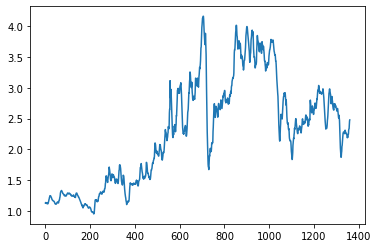

In [39]:
af['All Grades'].sort_index().plot.line()

Donde podemos ver que los precios fueron más alto entre mayo de 2010 y febrero de 2014, teniendo un pico en 2008 con la crisis económica que se vivió en ese año. Ahora compararemos todas las columnas de la base mediante el siguiente gráfico **Stacked Plot**:

<AxesSubplot:>

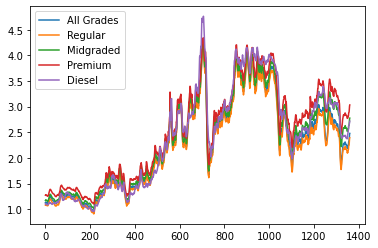

In [40]:
af.plot.line()

Como podemos ver todos los precios se comportan de manera similar, teniendo máximos y mínimos en fechas similares. Pero al intentar realizar gráficos de barra son casi imposibles de leer como se ve a continuación:

<AxesSubplot:>

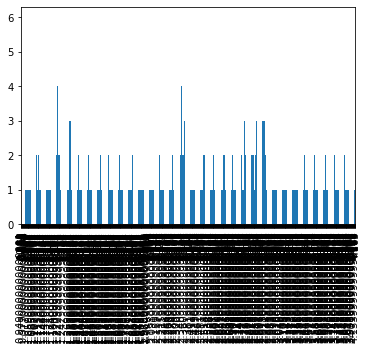

In [41]:
af['All Grades'].value_counts().sort_index().plot.bar()

Pero si podemos visualizar un histograma que cuente las veces que el precio promedio ha estado por encima de los 4 dólares, los cuales parecen ser outliers según el gráfico de líneas:

<AxesSubplot:ylabel='Frequency'>

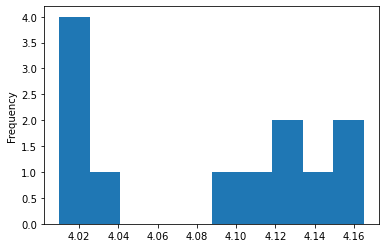

In [46]:
af[af['All Grades'] > 4]['All Grades'].plot.hist()

Al intentar hacer un gráfico de puntos se obtiene un **scatter plot** con los precios mayores a 4 dólares se obtienen datos muy dispersos en una muestra de 12 datos, ya que unicamente 12 veces el precio promedio ha sido mayor a los 4 dólares:

<AxesSubplot:xlabel='Date', ylabel='All Grades'>

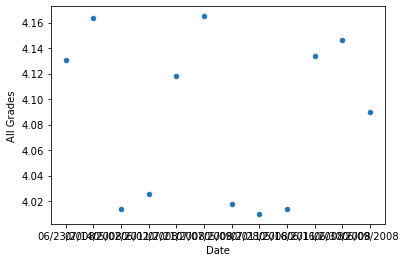

In [64]:
af[af['All Grades'] > 4].sample(12).plot.scatter(x='Date', y='All Grades')

Como podemos ver el precio más alto ha sido de 4 dólares con 16 centavos y se ha presentado 2 veces. Hasta ahora hemos visto un buen análisis con gráficos, pero no podemos realizar un **Hexplot** ya que nuestro eje X no es una columna numérica y esta requiere que así lo sea. Tampoco podemos realizar gráficos bivariantes ya que tenemos unicamente precios con sus fechas, los cuales no son dos vatos que cumplan dos categorías o más (es decir, con respuestas como "Sí - No", "Hombre-Mujer", etc.) lo cual hace un poco más dificil el análisis. Pero sí podemos generar un mapa de correlación entre las columnas de los precios promedio:

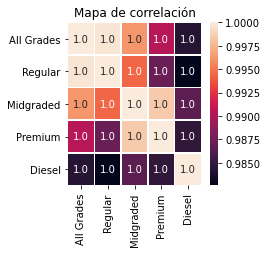

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize = (3,3))
sns.heatmap(af.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

El cual nos muestra resultados muy parecidos a los vistos anteriormente que van entre del 0.985 hasta el 1, pero para ver mejor el comportamiento de los precios podemos ver los siguientes gráficos que podemos construir gracias a seaborn:

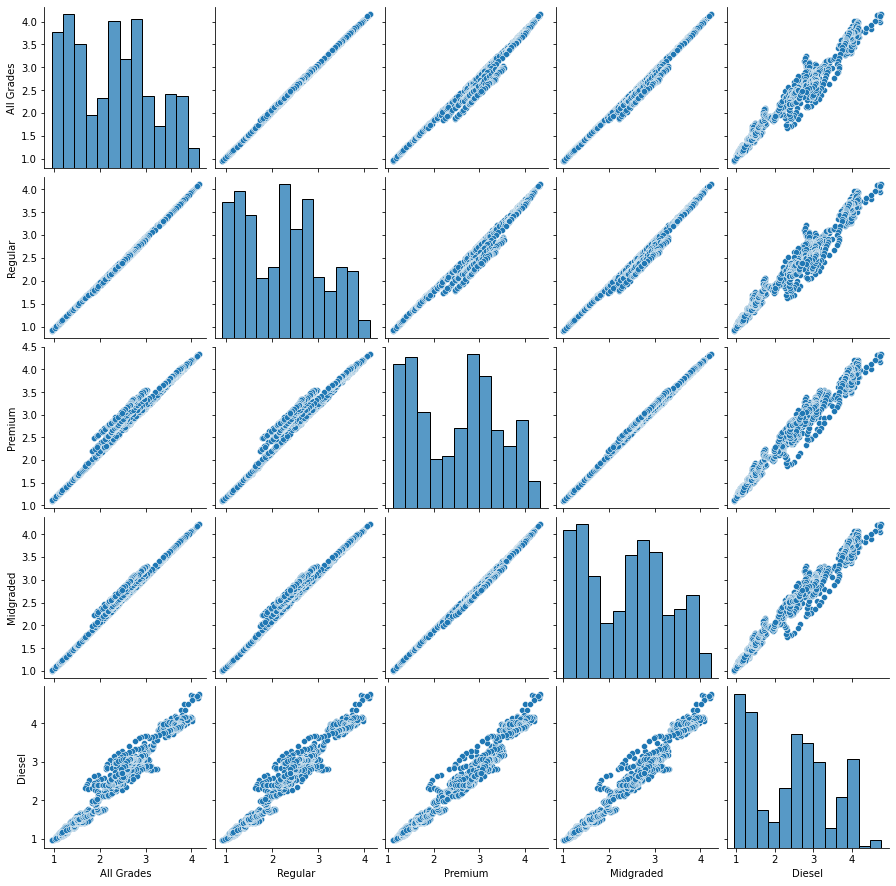

In [71]:
sns.pairplot(af[['All Grades', 'Regular', 'Premium', 'Midgraded', 'Diesel']])

Gracias a este gráfico podemos confirmar algo que si es muy sabido, el Diesel es un tipo de gasolina más costo al resto, y se puede notar ya que los tipos entre sí parecen tener un comportamiento similar, pero cuando se les compara con el Diesel se ve una dispersión mucho mayor entre los dos tipos de gasolina que se comparan.

### Base de datos secundaria
* **Nombre:** 14 Years of Inflation (IPC) in Latino America
* **URL:** https://www.kaggle.com/jaforero/inflation-ipc-in-latam?select=Inflation.csv

#### Parte descriptiva
Al importar esta base de datos nos damos cuenta que es una base de datos muy pobre en información ya que únicamente de manera numérica contamos con el año y la tasa de inflación, aunque está separado por país:

In [80]:
tf=pd.read_csv("Inflation.csv",encoding='latin1') #Ayuda de: https://www.edureka.co/community/51909/unicodedecodeerror-codec-decode-position-unexpected-data
print("Los datos sin manipulación son:")
print(tf)

Los datos sin manipulación son:
             Country  Year                                               Link  \
0           Ecuador   2020  https://www.ecuadorencifras.gob.ec//indice-de-...   
1        El Salvador  2020      http://www.bcr.gob.sv/bcrsite/?x21=73&lang=es   
2             Panamá  2020                http://www.contraloria.gob.pa/inec/   
3    Rep. Dominicana  2020                      http://www.bancentral.gov.do/   
4            Bolivia  2020    https://www.bcb.gob.bo/?q=indicadores_inflacion   
..               ...   ...                                                ...   
243         Colombia  2007                            http://www.dane.gov.co/   
244          Uruguay  2007                  http://www.ine.gub.uy/Default.asp   
245           Brazil  2007  http://www.bcb.gov.br/pec/metas/tabelametasere...   
246        Argentina  2007  http://www.indec.mecon.ar/nivel4_default.asp?i...   
247        Venezuela  2007  http://www.ine.gov.ve/index.php?option=com_con...

Al crear un data frame auxiliar con la información que nos interesa encontramos lo siguiente:

In [184]:
tf.rename(columns={'Country':'Pais','Year':'Año','Anual Rate':'TasaAnual'},inplace=True)
rf=tf.drop(['Link','Source'],axis=1)
print(rf)

                Pais   Año TasaAnual
0           Ecuador   2020    -0.93%
1        El Salvador  2020    -0.09%
2             Panamá  2020       NaN
3    Rep. Dominicana  2020     5.55%
4            Bolivia  2020     0.70%
..               ...   ...       ...
243         Colombia  2007     5.70%
244          Uruguay  2007     8.50%
245           Brazil  2007     4.50%
246        Argentina  2007     8.50%
247        Venezuela  2007    22.50%

[248 rows x 3 columns]


Trabajaremos las medidas descriptivas siguientes únicamente con la columna tasa anual, ya que es la única con la que contamos datos para trabajar, pero primero veremos si hay datos nulos y eliminaremos esa columna:

In [185]:
z=rf['TasaAnual'].count()
print("Los datos son: ",len(rf['TasaAnual']))
if len(rf['TasaAnual']) == z:
    print("No hay datos nulos")
else:
    print("Hay datos nulos")
    rf=rf.dropna(axis=0)
    zaux=z=rf['TasaAnual'].count()
    if len(rf['TasaAnual']) == zaux:
        print("Había datos nulos pero ya se han eliminado")
print("Los datos son: ",rf['TasaAnual'].count())

Los datos son:  248
Hay datos nulos
Había datos nulos pero ya se han eliminado
Los datos son:  246


Ahora al querer trabajar con los números nos damos cuenta que estos están en formato str y no pueden ser convertidos facilmente con el **astype** a flotante ya que tienen un % al final, para ello los convertimos a decimal para poder comenzar a trabajar:

In [189]:
d=rf['TasaAnual']
daux=list()
for z in d:
    ta=z[0:len(z)-1] #Ayuda tomada de: https://parzibyte.me/blog/2017/12/06/remover-primer-ultimo-caracter-python/
    ta=float(ta)
    ta=round(ta/100,4) #Ayuda tomada de: https://micro.recursospython.com/recursos/como-redondear-un-numero-decimal.html
    daux.append(ta)
rf['TasaAnual']=daux

Ahora comenzaremos a trabajar con las medidas descriptivas las cuales son: media, mediana, mínimo, máximo, entre otras cosas, las cuales son las siguientes:

In [190]:
print("MEDIDAS ESTADISTICAS")
print("La suma de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].sum())
print("La media de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].mean())
print("La mediana de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].median())
print("La inflación mínima entre las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].min())
print("La inflación máxima entre las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].max())

MEDIDAS ESTADISTICAS
La suma de las tasas de inflación en Latinoamérica es: 919.8631999999998
La media de las tasas de inflación en Latinoamérica es: 3.739281300813009
La mediana de las tasas de inflación en Latinoamérica es: 0.043
La inflación mínima entre las tasas de inflación en Latinoamérica es: -0.014
La inflación máxima entre las tasas de inflación en Latinoamérica es: 800.02


Como medidas de dispersión tenemos a la varianza, la desviación estándar, la asimetría y la curtorsis, las cuales vienen dadas como:
median(), var(), std(): Mediana, varianza y desviación estandar.
skew(): Valor de asimetría en los datos.
kurt(): Característica de forma de su distribución de frecuencias/probabilidad.
corr(): Correlación de los datos
cov(): Covarianza de los datos.

In [136]:
print("MEDIDAS DE DISPERSION")
print("La varianza de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].var())
print("La desviación estándar de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].std())
print("La asimetría de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].skew())
print("La curtosis de las tasas de inflación en Latinoamérica es:",rf['TasaAnual'].kurt())

MEDIDAS DE DISPERSION
La varianza de las tasas de inflación en Latinoamérica es: 2623.3816703665034
La desviación estándar de las tasas de inflación en Latinoamérica es: 51.21895811480846
La asimetría de las tasas de inflación en Latinoamérica es: 15.47319338132214
La curtosis de las tasas de inflación en Latinoamérica es: 241.32733627412978


Como tenemos una base de datos con años en una columna y otra con tasas de inflación, es normal obtener covarianzas y correlaciones de manera extraña ya que son datos que no tienen nada que ver el uno con el otro

In [143]:
print("La covarianza entre las columnas es:")
rf.cov()

La covarianza entre las columnas es:


,Año,TasaAnual
Año,15.775543,16.56164
TasaAnual,16.561640,2623.38167


In [144]:
print("La correlación entre las columnas es:")
rf.corr()

La correlación entre las columnas es:


,Año,TasaAnual
Año,1.000000,0.081411
TasaAnual,0.081411,1.000000


#### Parte gráfica
Al realizar esta parte es interesante ya que si bien podemos no realizar gráficos multivariados o histogramas dado que tenemos variables que es muy poco probable que se repitan los valores, como se puede ver a continuación en la siguiente gráfica de barras:

<AxesSubplot:>

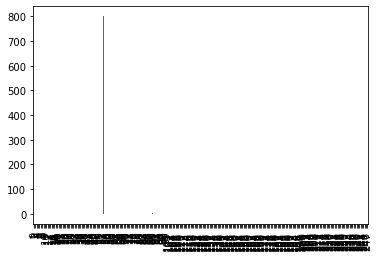

In [146]:
rf['TasaAnual'].plot.bar()

Es casi imposible visualizar algún dato en este gráfico pero si se elige algún país de Latinoamérica podemos ver la información de ese país por ejemplo tomaremos a Argentina en este ejemplo que haremos:

<AxesSubplot:>

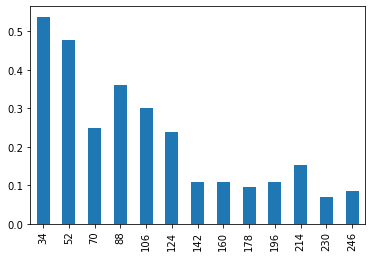

In [154]:
rf[rf['Pais'] == 'Argentina']['TasaAnual'].plot.bar()

Aunque de igual manera, un gráfico de barras no es una muy buena opción para visualizar la tasa de inflación de un país, ya que es casi imposible ver a que se refiere cada una de estas líneas, si bien sabemos a que se refiere el eje Y, no sabemos a que se refiere el eje X con esos números como 34 o 52, lo mismo ocurre con los **histogramas** como se puede ver a continuación:

<AxesSubplot:ylabel='Frequency'>

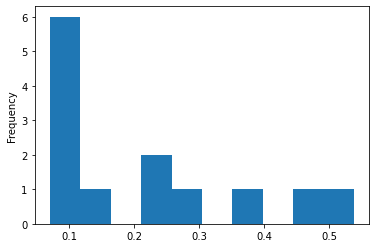

In [191]:
rf[rf['Pais'] == 'Argentina']['TasaAnual'].plot.hist()

Aunque con un histograma es más visible a que se refiere, ya que es cuantas veces ocurre una tasa de inflación, aunque no es una manera muy cómoda de verla. Un gráfico de barras de la librería **seaborn** es un poco más visual que los de matplotlib aunque no es la mejor visualización.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TasaAnual', ylabel='count'>

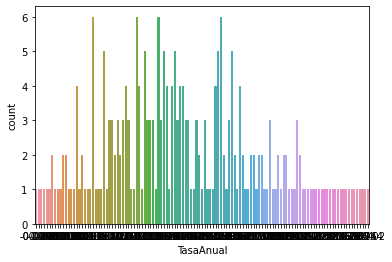

In [197]:
import seaborn as sns
sns.countplot(rf['TasaAnual'])

Aunque es muy dificil visualizar esto dado que se confunde un poco lo que quiere decir, al intentar hacer un un gráfico de líneas o de áreas nos arroja un error dado que hay tasas de inflación negativas, nos dice lo siguiente al hacer un código con **rf.plot.area()**, el error es: 
* ValueError: When stacked is True, each column must be either all positive or negative.TasaAnual contains both positive and negative values

Al hacer un **scatter plot** nos arroja el siguiente gráfico:

<AxesSubplot:xlabel='TasaAnual', ylabel='Año'>

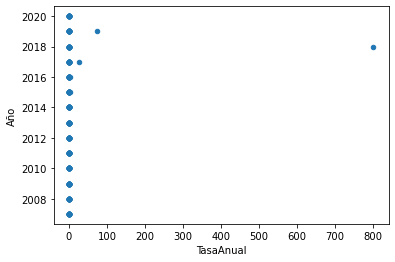

In [218]:
rf.plot.scatter(x='TasaAnual',y='Año')

Como podemos ver hay un outlier, indagando en los datos nos damos cuenta que este fue en venezuela, una inflación de 80000% se vivió en este país durante el año 2018. Un gráfico hexagonal nos muestra lo mismo, aunque este se basa más en frecuencias, es outlier no es visible.

<AxesSubplot:xlabel='TasaAnual', ylabel='Año'>

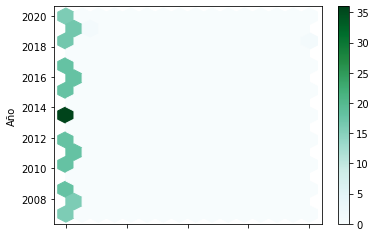

In [219]:
rf.plot.hexbin(x='TasaAnual', y='Año', gridsize=15)

Como vimos en nuestra base de datos anterior, es más visible una tendencia en un gráfico de lineas pero este gráfico no es nada entendible con esta base de datos:

<AxesSubplot:>

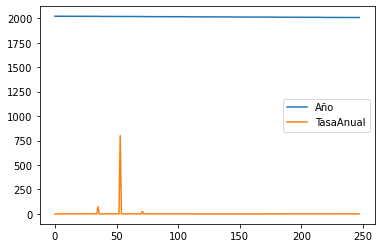

In [220]:
rf.plot.line()

Unicamente podemos ver un gran pico cuando ocurrió la inflación enorme de Venezuela en 2018, ahora veremos otro gráfico de hexágono (**parte de puntos extra**) el cual compararemos con el de la librería pandas con el de la librería seaborn, el gráfico de la librería pandas se vio dos gráficos arriba y el de seaborn es el siguiente:

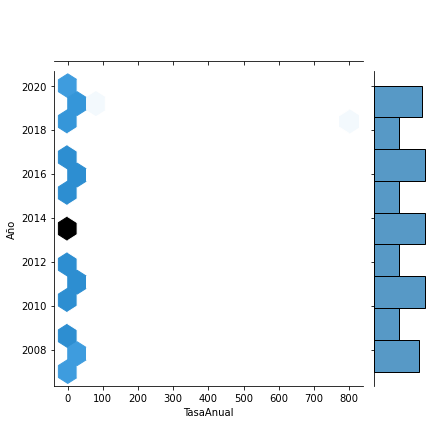

In [229]:
sns.jointplot(x='TasaAnual', y='Año', data=rf, kind='hex', gridsize=15)

Vistos ambos, es claro el de la librería pandas, ya que nos muestra a un lado una barra de que significa el color de los hexágonos mientras que el de seaborn nos muestra un histograma el cual no es tan entendible como la barra que muestra el de pandas. Al igual que en la base anterior, un mapa de correlaciones nos muestra lo que ya vimos:

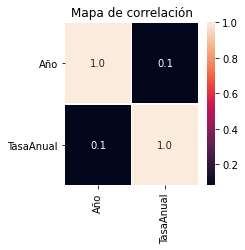

In [222]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize = (3,3))
sns.heatmap(rf.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Como vemos, no se correlacionan dado que son cosas nada que ver la una con la otra en el caso de esta base de datos.